### Using Prophet for Time Series Forecasting
#### Data Mining Project, done by Waleed Saeed and Yahya Qureshi

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [10]:
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardizing the 'cycle' and 'trend' columns
data[['ds', 'y']] = scaler.fit_transform(data[['cycle', 'trend']])


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/lyxk524v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/npubtkk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13936', 'data', 'file=/tmp/tmpzc099hd6/lyxk524v.json', 'init=/tmp/tmpzc099hd6/npubtkk5.json', 'output', 'file=/tmp/tmpzc099hd6/prophet_modelbc5ybjl8/prophet_model-20240516142048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:20:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/_0s11bur.json
DE

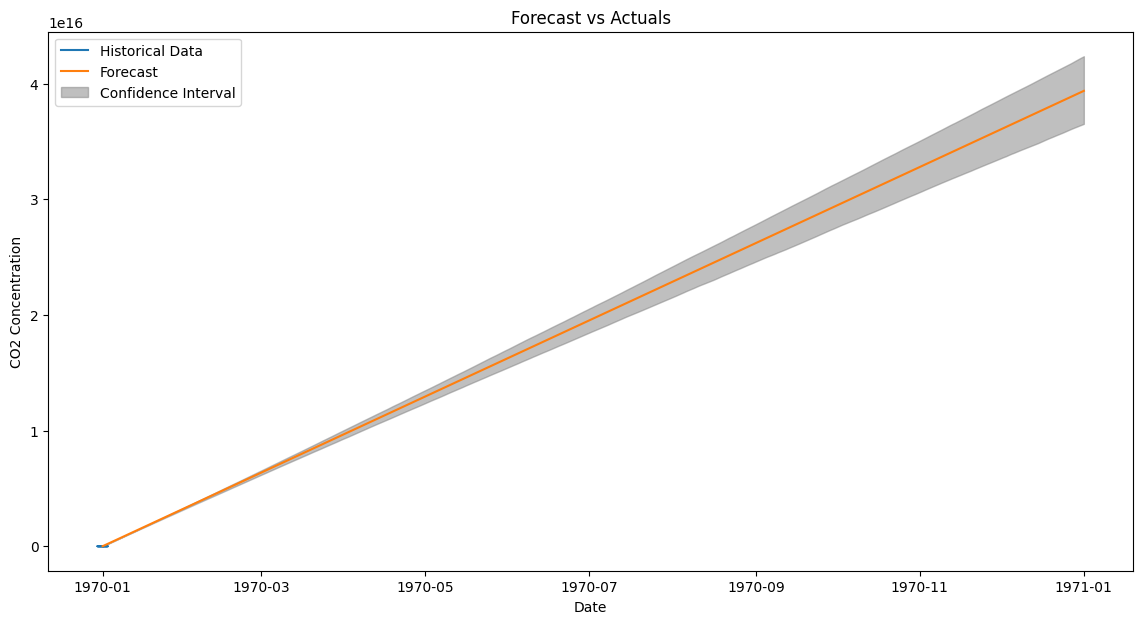

In [11]:
# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Reset the index
data.reset_index(inplace=True)

data['id'] = data.index

data.set_index('id', inplace=True)


# Initialize the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(data[['ds', 'y']])

# Make a future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # predict for the next year

# Forecast
forecast = model.predict(future)

# Convert datetime and forecast to numpy arrays for plotting
dates = np.array(forecast['ds'])
yhat = np.array(forecast['yhat'])
yhat_lower = np.array(forecast['yhat_lower'])
yhat_upper = np.array(forecast['yhat_upper'])

# Historical data
history_dates = np.array(data['ds'])
history_y = np.array(data['y'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(history_dates, history_y, label='Historical Data')
plt.plot(dates, yhat, label='Forecast')
plt.fill_between(dates, yhat_lower, yhat_upper, color='gray', alpha=0.5, label='Confidence Interval')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/yjls1__h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/xod07eqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72137', 'data', 'file=/tmp/tmpzc099hd6/yjls1__h.json', 'init=/tmp/tmpzc099hd6/xod07eqd.json', 'output', 'file=/tmp/tmpzc099hd6/prophet_modell3k8q0qm/prophet_model-20240516142141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


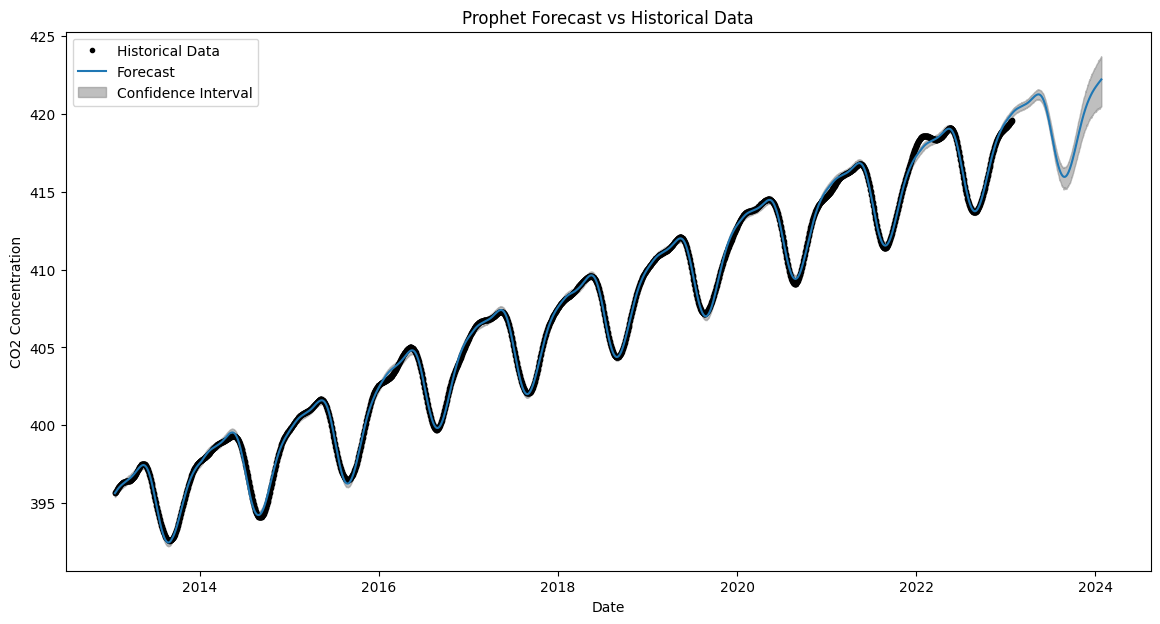

In [13]:
# Load and prepare your data
data = pd.read_csv(file_path)
data['ds'] = pd.to_datetime(data[['year', 'month', 'day']])
data['y'] = data['cycle']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data[['ds', 'y']])

# Create a future dataframe and predict
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Convert all data for plotting explicitly to numpy arrays to avoid indexing issues
historical_dates = np.array(data['ds'].dt.to_pydatetime())  # Converting dates to numpy array
historical_y = np.array(data['y'])  # Converting data to numpy array
forecast_dates = np.array(forecast['ds'].dt.to_pydatetime())
forecast_y = np.array(forecast['yhat'])
forecast_y_lower = np.array(forecast['yhat_lower'])
forecast_y_upper = np.array(forecast['yhat_upper'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(historical_dates, historical_y, 'k.', label='Historical Data')
plt.plot(forecast_dates, forecast_y, label='Forecast')
plt.fill_between(forecast_dates, forecast_y_lower, forecast_y_upper, color='gray', alpha=0.5, label='Confidence Interval')
plt.title('Prophet Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/gz20zw35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/mhfw9we_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53873', 'data', 'file=/tmp/tmpzc099hd6/gz20zw35.json', 'init=/tmp/tmpzc099hd6/mhfw9we_.json', 'output', 'file=/tmp/tmpzc099hd6/prophet_modelpzo1xww5/prophet_model-20240516142149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2016-02-26 00:00:00 and 2022-01-25 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/1k_bm3j3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/vjol3oun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17967', 'data', 'file=/tmp/tmpzc099hd6/1k_bm3j3.json', 'init=/tmp/tmpzc099hd6/vjol3oun.json', 'output', 'file=/tmp/tmpzc099hd6/prophet_model3uh_3zrl/prophet_model-20240516142153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/n9g31003.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc099hd6/8qqwk9xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  0.129543  0.359921  0.279303  0.000685  0.000556  0.000685   
1 38 days  0.134298  0.366466  0.283590  0.000696  0.000566  0.000696   
2 39 days  0.139187  0.373078  0.287785  0.000706  0.000581  0.000706   
3 40 days  0.144186  0.379718  0.291936  0.000716  0.000606  0.000717   
4 41 days  0.149260  0.386342  0.296045  0.000727  0.000625  0.000727   

   coverage  
0  0.366764  
1  0.370983  
2  0.375203  
3  0.378286  
4  0.381532  


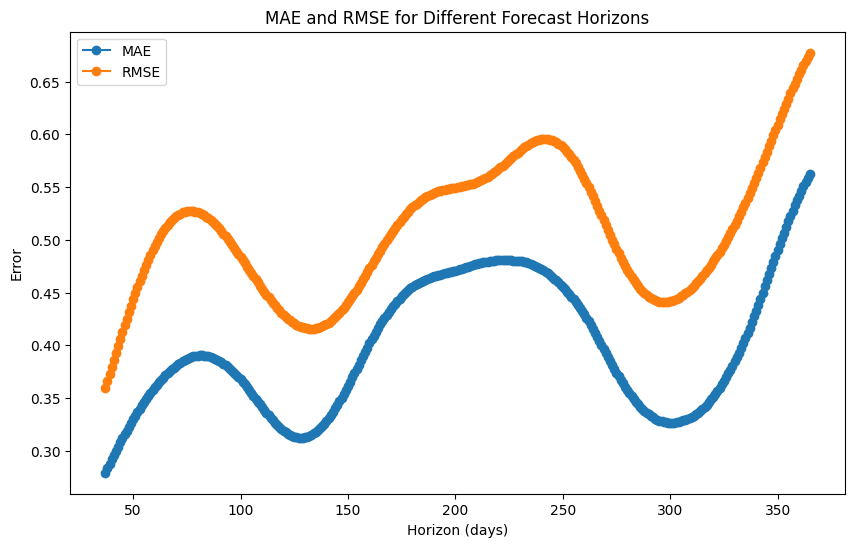

In [14]:
# Load and prepare your data
data = pd.read_csv(file_path)
data['ds'] = pd.to_datetime(data[['year', 'month', 'day']])
data['y'] = data['cycle']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data)

# Set up cross-validation
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# Prepare data for plotting
horizon = np.array(df_p['horizon'].dt.total_seconds() / 86400)  # convert timedelta to days as float
mae = np.array(df_p['mae'])
rmse = np.array(df_p['rmse'])

# Plotting the performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(horizon, mae, marker='o', label='MAE')
ax.plot(horizon, rmse, marker='o', label='RMSE')
ax.set_title('MAE and RMSE for Different Forecast Horizons')
ax.set_xlabel('Horizon (days)')
ax.set_ylabel('Error')
ax.legend()
plt.show()
